# Introduction
Nitrous Oxide is used in various industries and products, but perhaps its most intriguing use is as an oxidizer for hobbyist hybrid, tribrid, and liquid bipropellant motors. Nitrous is a fairly powerful oxidizer, and as a result hobbyists working with the substance must have an understanding of the thermochemical properties, safe handling, and limits of the oxidizer.
Hybrid rocket motors are defined as a rocket motor that involves a solid fuel and liquid oxidizer. The liquid oxidizer is sent through a port in a solid grain of fuel in the combustion chamber, reacting to produce hot gasses and high pressures and as a result is able to propel rockets.

# Curve fits:
The formula that determine the fits for vapor pressure vs temperature and density versus temperature are from ESDU 91022 [1]. For vapor pressure:
$$p = p_c \exp\big({\frac{-6.71893(1 - T_r) + 1.35966(1 - T_r)^{3/2} -1.3779(1 - T_r)^{5/2} -4.051(1 - T_r)^{5}}{T_r}}\big)$$
For density (liquid):
$$\rho(l) = \rho_c \exp\big(1.72328(1-T_r)^{1/3} -0.83950(1-T_r)^{2/3} + 0.51060(1-T_r) -0.10412(1-T_r)^{4/3} \big)$$
For density (vapor):
$$\rho(g) = \rho_c \exp\big(-1.00900\big(\frac{1}{T_r}-1\big)^{1/3} -6.28792\big(\frac{1}{T_r}-1\big)^{2/3} + 7.50332\big(\frac{1}{T_r}-1\big) -7.90463\big(\frac{1}{T_r}-1\big)^{4/3} + 0.629427\big(\frac{1}{T_r}-1\big)^{5/3} \big)$$
Here, $T_c$ is the critical temperature,  $p_c$ is the critical pressure, $\rho_c$ is the critical density, and $T_r = \frac{T}{T_c}$.

For the enthalpies and difference in enthalpy:
$$h(l) = -200 + 116.043(1-T_r)^\frac{1}{3} -917.225(1-T_r)^\frac{2}{3} + 794.779(1-T_r) -589.587(1-T_r)^\frac{4}{3}$$
$$h(g) = -200 + 440.055(1-T_r)^\frac{1}{3} -459.701(1-T_r)^\frac{2}{3} + 434.081(1-T_r) -485.338(1-T_r)^\frac{4}{3} $$
$$\Delta h = h(g)-h(l)$$

These formula help us determine the properties of Nitrous Oxide as a function of temperature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
%matplotlib notebook

The properties of Nitrous Oxide can be found in the ESDU91022 paper, and the table of values listed on page 12 has been replicated in a .txt file for use in this (as well as future) documents.

In [3]:
# Read the data file. The result is a dataframe object, which is named df in this case.
df = pd.read_csv('NitrousTable_ESDU91022.txt', delimiter='\t')

#print first five rows of data with the header
print(df.head())

    T (K)  P (kPa)  pl (kg/m3)  pg (kg/m3)  hl (kJ/kg)  hg (kJ/kg)  dh (kJ/kg)
0  182.33   87.730      1222.8       2.613        -474       -96.8         377
1  184.69  101.325      1216.3       2.987        -470       -95.4         375
2  185.00  103.200      1215.5       3.039        -470       -95.2         374
3  190.00  138.000      1201.6       3.980        -461       -92.2         369
4  195.00  181.300      1187.4       5.133        -452       -89.3         363


In [4]:
Tdata = df['T (K)']
Pdata = df['P (kPa)']
pldata = df['pl (kg/m3)']
pgdata = df['pg (kg/m3)']
enthldata = df['hl (kJ/kg)']
enthgdata = df['hg (kJ/kg)']
dhdata = df['dh (kJ/kg)']
Tc = 309.57 #critical temperature, K
Pc = 7251.0 #critical pressure, kPa
ρc = 452.0 #critical density, kg/m3

In [5]:
Ru = 8.3144598 #Universal gas const. kJ/kmol-K
MN2O = 44.013 #Molecular weight of Nitrous Oxide, kg/kmol
RN2O = Ru/MN2O
t = np.array(Tdata)/Tc #reduced temperature, T/Tc
p = np.array(Pdata)/Pc #reduced pressure, P/Pc
ρl_r = np.array(pldata)/ρc #reduced liquid density, ρl/ρc
ρg_r = np.array(pgdata)/ρc #reduced vapor/gas density, ρg/ρc

In [6]:
def PTfit(T, b1, b2, b3, b4):
    q = np.exp((b1*(1 - T) + b2*((1 - T)**1.5) + b3*((1 - T)**2.5) + b4*((1 - T)**5))/T)
    return q

def plTfit(T, b1, b2, b3, b4):
    q = np.exp(b1*(1-T)**(1/3) + b2*(1-T)**(2/3) + b3*(1-T) + b4*(1-T)**(4/3))
    return q

def pgTfit(T, b1, b2, b3, b4, b5):
    q = np.exp(b1*((1/T) - 1)**(1/3) + b2*((1/T) - 1)**(2/3) + b3*((1/T) - 1) + b4*((1/T) - 1)**(4/3) + b5*((1/T) - 1)**(5/3))
    return q

def hTfit(T, b1, b2, b3, b4, b5):
    q = b1 + b2*(1-T)**(1/3) + b3*(1-T)**(2/3) + b4*(1-T) + b5*(1-T)**(4/3)
    return q

In [8]:
guessPT = [-6,1,-1,-4] # this is the initial guess for the fit parameters; you need a 1 for each parameter
paramsPT, covarPT = curve_fit(PTfit, t, p, p0=guessPT)

guessρlT = [2,-1,0.5,0]
paramsρlT, covarρlT = curve_fit(plTfit, t, ρl_r, p0=guessρlT)

guessρgT = [-1,-6,7,-7, 1]
paramsρgT, covarρgT = curve_fit(pgTfit, t, ρg_r, p0=guessρgT)

guesshlT = [-200,100,-900,800,-600]
paramshlT, covarhlT = curve_fit(hTfit, t, enthldata, p0=guesshlT)

guesshgT = [-200,400,-400,400,-500]
paramshgT, covarhgT = curve_fit(hTfit, t, enthgdata, p0=guesshgT)

In [9]:
paramsPT #Checking. The actual values referenced in ESDU91022 are: -6.71893, 1.35966, -1.3779, -4.051

array([-6.71651022,  1.34938831, -1.34825441, -4.22217031])

In [10]:
paramsρlT #Checking. The actual values referenced in ESDU91022 are: 1.72328, -0.83950, 0.51060, -0.10412

array([ 1.72229108, -0.83381081,  0.49982799, -0.09751752])

In [11]:
paramsρgT #Checking. The actual values referenced in ESDU91022 are: -1.00900, -6.28792, 7.50332, -7.90463, 0.629427

array([-1.01664339, -6.22752945,  7.32551421, -7.67723497,  0.52388161])

In [12]:
paramshlT #Checking. The actual values referenced in ESDU91022 are: −200 116.043 −917.225 794.779 −589.587

array([-200.0038444 ,  125.39897308, -976.88316534,  916.51676995,
       -668.28470961])

In [13]:
paramshgT #Checking. The actual values referenced in ESDU91022 are: −200 440.055 -459.701 434.081 -485.338

array([-199.99829209,  440.7295489 , -463.65372701,  441.49470486,
       -489.78370995])

In [14]:
ot = np.linspace(t[0], t[-1], 1000)
op = PTfit(ot, paramsPT[0], paramsPT[1], paramsPT[2], paramsPT[3])
oρl = plTfit(ot, paramsρlT[0], paramsρlT[1], paramsρlT[2], paramsρlT[3])
oρg = pgTfit(ot, paramsρgT[0], paramsρgT[1], paramsρgT[2], paramsρgT[3], paramsρgT[4])
ohl = hTfit(ot, paramshlT[0], paramshlT[1], paramshlT[2], paramshlT[3], paramshlT[4])
ohg = hTfit(ot, paramshgT[0], paramshgT[1], paramshgT[2], paramshgT[3], paramshgT[4])

<IPython.core.display.Javascript object>


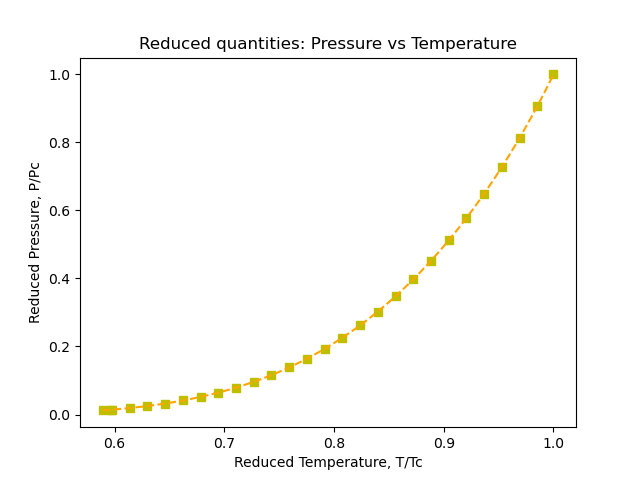

Text(0.5, 1.0, 'Reduced quantities: Pressure vs Temperature')

In [15]:
plt.figure(dpi=100)
plt.plot(t, p, 'ys')
plt.plot(ot, op, color = 'orange', linestyle='--')
plt.xlabel('Reduced Temperature, T/Tc')
plt.ylabel('Reduced Pressure, P/Pc')
plt.title("Reduced quantities: Pressure vs Temperature")

<IPython.core.display.Javascript object>


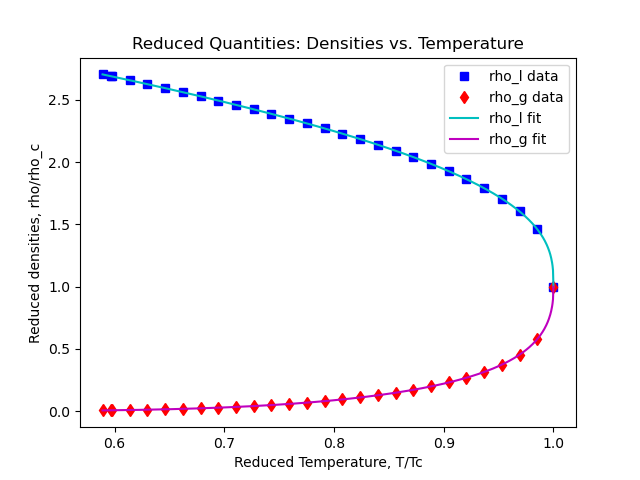

In [16]:
plt.figure(dpi=100)
plt.plot(t, ρl_r, 'bs', label='rho_l data')
plt.plot(t, ρg_r, 'rd', label = 'rho_g data')
plt.plot(ot, oρl, 'c-', label='rho_l fit')
plt.plot(ot, oρg, 'm-', label='rho_g fit')
plt.xlabel('Reduced Temperature, T/Tc')
plt.ylabel('Reduced densities, rho/rho_c')
plt.title("Reduced Quantities: Densities vs. Temperature")
plt.legend(loc='best')

<IPython.core.display.Javascript object>


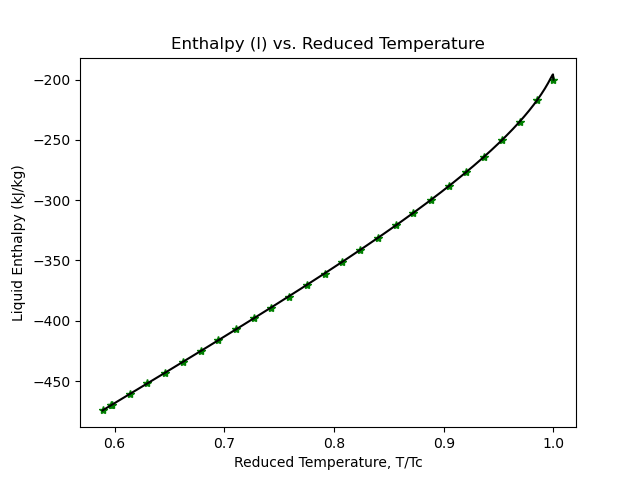

Text(0.5, 1.0, 'Enthalpy (l) vs. Reduced Temperature')

In [17]:
plt.figure(dpi=100)
plt.plot(t, enthldata, 'g*')
plt.plot(ot, ohl, 'k-')
plt.xlabel('Reduced Temperature, T/Tc')
plt.ylabel('Liquid Enthalpy (kJ/kg)')
plt.title('Enthalpy (l) vs. Reduced Temperature')

<IPython.core.display.Javascript object>


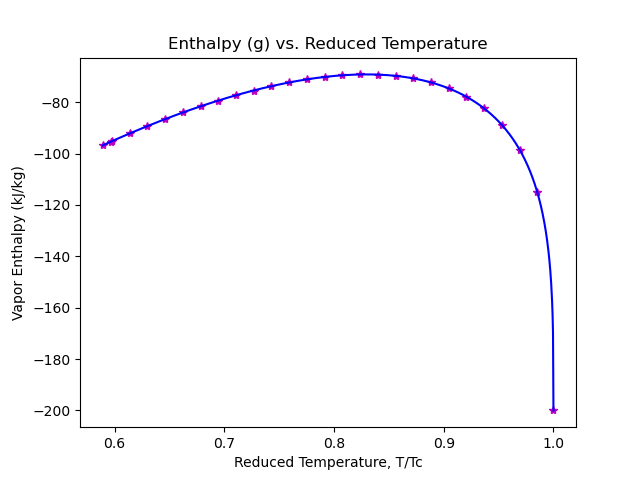

Text(0.5, 1.0, 'Enthalpy (g) vs. Reduced Temperature')

In [18]:
plt.figure(dpi=100)
plt.plot(t, enthgdata, 'm*')
plt.plot(ot, ohg, 'b-')
plt.xlabel('Reduced Temperature, T/Tc')
plt.ylabel('Vapor Enthalpy (kJ/kg)')
plt.title('Enthalpy (g) vs. Reduced Temperature')

<IPython.core.display.Javascript object>


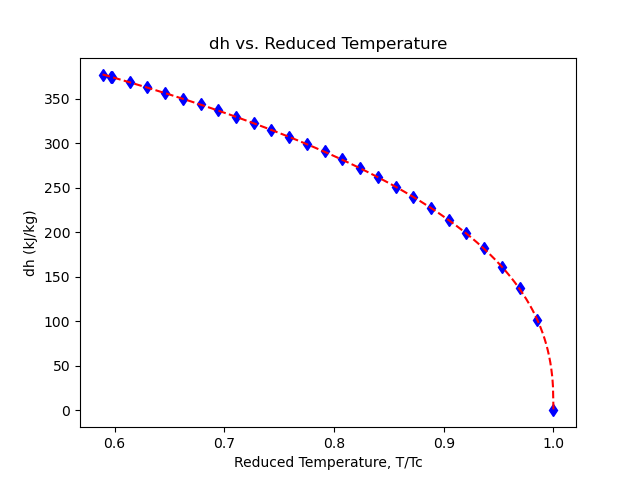

Text(0.5, 1.0, 'dh vs. Reduced Temperature')

In [19]:
odh = ohg - ohl
plt.figure(dpi=100)
plt.plot(t, dhdata, 'bd')
plt.plot(ot, odh, 'r--')
plt.xlabel('Reduced Temperature, T/Tc')
plt.ylabel('dh (kJ/kg)')
plt.title('dh vs. Reduced Temperature')

In [20]:
#This entire box was just for messing with the Z factor, described below.
# s2 = (273.15 + 36.42)/309.57
# s0 = PTfit(s2, paramsPT[0], paramsPT[1], paramsPT[2], paramsPT[3])
# s1 = pgTfit(s2, paramsρgT[0], paramsρgT[1], paramsρgT[2], paramsρgT[3], paramsρgT[4])
# (s0/(s1*s2*RN2O))*(Pc/(ρc*Tc))

# Z (Compressibility) Factor
Z appears whenever a gas is said to be too dense or too cold to behave in an ideal manner [2].
The gas law then transforms into:
$$P = Z\rho RT$$

In [21]:
#Z is a compressibility factor. It is used in gasses that are too cold or too dense: P = Z*rho*R*T
def Z(T): #T is temp in Kelvin
    tr = T/Tc
    s0 = PTfit(tr, paramsPT[0], paramsPT[1], paramsPT[2], paramsPT[3])
    s1 = pgTfit(tr, paramsρgT[0], paramsρgT[1], paramsρgT[2], paramsρgT[3], paramsρgT[4])
    z = (Pc/(ρc*Tc))*s0/(s1*RN2O*tr)
    return z

def Z_reduced(T): #T is the reduced temperature
    s0 = PTfit(T, paramsPT[0], paramsPT[1], paramsPT[2], paramsPT[3])
    s1 = pgTfit(T, paramsρgT[0], paramsρgT[1], paramsρgT[2], paramsρgT[3], paramsρgT[4])
    z = (Pc/(ρc*Tc))*s0/(s1*RN2O*T)
    return z

<IPython.core.display.Javascript object>


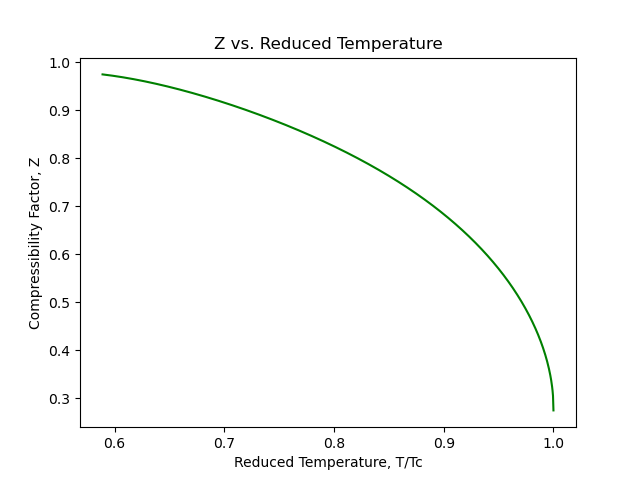

Text(0.5, 0, 'Reduced Temperature, T/Tc')

In [22]:
oz = Z_reduced(ot)
plt.figure(dpi=100)
plt.plot(ot,oz,'g')
plt.title('Z vs. Reduced Temperature')
plt.ylabel("Compressibility Factor, Z")
plt.xlabel("Reduced Temperature, T/Tc")

# Resources:
[1] - ESDU91022: http://edge.rit.edu/edge/P07106/public/Nox.pdf

[2] - The Science and Design of the Hybrid Rocket Engine, R.M. Newlands

# Constraints, issues, and future plans
Time was a very important constraint that I did not initially consider. Initially, I intended the project to be a combination of obtaining functions that described N2O's properties and putting them to use in a simulation of a very basic hybrid rocket motor. This would have further described the behavior of Nitrous as it exits a tank through an orifice and how it generally behaves as the tank empties.
As I was unable to properly do this program justice (at least in the way of developing a proper hybrid rocket motor performance simulation), I may return to this with much more knowledge on simulating a hybrid and actually get to doing so, cross checking it with numbers that the book [2] provides.